# Data Exploration

In [32]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score, recall_score, precision_score, roc_auc_score, roc_curve, auc

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
df_2018 = pd.read_csv('/content/drive/MyDrive/Radiomics Journey/BraTS2018_Features_T1.csv')
df_2019 = pd.read_csv('/content/drive/MyDrive/Radiomics Journey/BraTS2019_Features_T1.csv')
df_2020 = pd.read_csv('/content/drive/MyDrive/Radiomics Journey/BraTS2020_Features_T1.csv')

In [8]:
combined_df = pd.concat([df_2019, df_2018, df_2020], ignore_index=True)
combined_df.head(5)

,diagnostics_Versions_PyRadiomics,diagnostics_Versions_Numpy,diagnostics_Versions_SimpleITK,diagnostics_Versions_PyWavelet,diagnostics_Versions_Python,diagnostics_Configuration_Settings,diagnostics_Configuration_EnabledImageTypes,diagnostics_Image-original_Hash,diagnostics_Image-original_Dimensionality,diagnostics_Image-original_Spacing,...,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength,Diagnosis
0,v3.0.1,1.23.5,2.3.0,1.4.1,3.10.12,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},33e08f677effad5e6754e93801c0729343666c94,3D,"(1.0, 1.0, 1.0)",...,0.011435,6.144567,0.018463,1.617553e+05,2.252882,0.000957,104.094198,0.005879,0.365346,HGG
1,v3.0.1,1.23.5,2.3.0,1.4.1,3.10.12,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},73620355b22a3b037d6fc276d63517e4eef37d70,3D,"(1.0, 1.0, 1.0)",...,0.054986,5.252435,0.008486,1.872055e+06,73.989228,0.000336,9.003672,0.004367,0.019459,HGG
2,v3.0.1,1.23.5,2.3.0,1.4.1,3.10.12,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},d9b9dee5c48b51d0edab0c5449bfed18b03f72e3,3D,"(1.0, 1.0, 1.0)",...,0.032918,6.067100,0.019917,2.249511e+05,5.781757,0.000646,33.321381,0.005766,0.117617,HGG
3,v3.0.1,1.23.5,2.3.0,1.4.1,3.10.12,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},fb07dcdfb04857334dc375bd17a2ab2d5b68d2da,3D,"(1.0, 1.0, 1.0)",...,0.052850,4.426734,0.087167,9.805270e+02,0.959756,0.034447,3.630403,0.015182,0.580946,HGG
4,v3.0.1,1.23.5,2.3.0,1.4.1,3.10.12,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},215b71e2f162abf87c53da2a5c4df9cba50e88f1,3D,"(1.0, 1.0, 1.0)",...,0.014013,6.107923,0.034466,3.988700e+04,12.794691,0.000747,30.437174,0.017265,0.049882,HGG


In [9]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987 entries, 0 to 986
Columns: 130 entries, diagnostics_Versions_PyRadiomics to Diagnosis
dtypes: float64(110), int64(2), object(18)
memory usage: 1002.5+ KB


In [10]:
combined_df.describe()

,diagnostics_Image-original_Mean,diagnostics_Image-original_Minimum,diagnostics_Image-original_Maximum,diagnostics_Mask-original_VoxelNum,diagnostics_Mask-original_VolumeNum,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
count,987.000000,987.0,987.000000,987.00000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,...,987.000000,987.000000,987.000000,987.000000,9.870000e+02,987.000000,987.000000,987.000000,9.870000e+02,987.000000
mean,100.419322,0.0,1672.704064,23053.06383,34.120567,0.724093,0.558648,24.815358,46.140158,45.342468,...,371.695071,0.031734,5.687619,0.093629,6.346101e+05,44.656442,0.008225,4158.768727,3.121610e-02,1.338644
std,181.386113,0.0,3665.553112,31120.99258,36.995047,0.154672,0.146571,10.304120,19.632103,16.316431,...,2709.225947,0.050217,1.086697,0.121170,3.480346e+06,541.970306,0.034782,43455.120597,5.765481e-02,7.192097
min,6.609346,0.0,111.000000,47.00000,1.000000,0.222498,0.124907,3.738339,7.287142,8.062258,...,1.078749,0.000039,1.584963,0.000322,5.684114e-01,0.004755,0.000090,0.000411,1.629837e-07,0.000775
25%,45.814439,0.0,677.000000,3940.00000,8.000000,0.636463,0.467046,17.393009,33.002982,33.726661,...,18.171201,0.008201,5.029857,0.024848,2.494205e+03,2.126595,0.000557,16.337047,1.078379e-02,0.052495
50%,57.602020,0.0,879.000000,10557.00000,22.000000,0.742091,0.577956,23.725280,44.100150,43.737855,...,36.058104,0.017787,5.595141,0.055704,1.988103e+04,5.688429,0.001121,41.322484,1.876903e-02,0.140416
75%,84.883105,0.0,1426.000000,26654.00000,48.000000,0.841569,0.663829,31.149995,56.950923,56.080300,...,81.009330,0.035183,6.330676,0.101408,1.032853e+05,14.081624,0.003168,114.502173,2.851293e-02,0.399436
max,1778.219889,0.0,32767.000000,189152.00000,270.000000,0.984177,0.878147,59.587263,171.979417,105.475116,...,44923.941306,0.559769,8.940406,0.770955,4.237417e+07,9818.926992,0.521373,670390.979289,6.787136e-01,106.860586


In [11]:
for column in combined_df.columns:
  print(column)

diagnostics_Versions_PyRadiomics
diagnostics_Versions_Numpy
diagnostics_Versions_SimpleITK
diagnostics_Versions_PyWavelet
diagnostics_Versions_Python
diagnostics_Configuration_Settings
diagnostics_Configuration_EnabledImageTypes
diagnostics_Image-original_Hash
diagnostics_Image-original_Dimensionality
diagnostics_Image-original_Spacing
diagnostics_Image-original_Size
diagnostics_Image-original_Mean
diagnostics_Image-original_Minimum
diagnostics_Image-original_Maximum
diagnostics_Mask-original_Hash
diagnostics_Mask-original_Spacing
diagnostics_Mask-original_Size
diagnostics_Mask-original_BoundingBox
diagnostics_Mask-original_VoxelNum
diagnostics_Mask-original_VolumeNum
diagnostics_Mask-original_CenterOfMassIndex
diagnostics_Mask-original_CenterOfMass
original_shape_Elongation
original_shape_Flatness
original_shape_LeastAxisLength
original_shape_MajorAxisLength
original_shape_Maximum2DDiameterColumn
original_shape_Maximum2DDiameterRow
original_shape_Maximum2DDiameterSlice
original_shape_

In [12]:
combined_df.isnull().sum()

diagnostics_Versions_PyRadiomics    0
diagnostics_Versions_Numpy          0
diagnostics_Versions_SimpleITK      0
diagnostics_Versions_PyWavelet      0
diagnostics_Versions_Python         0
                                   ..
original_ngtdm_Coarseness           0
original_ngtdm_Complexity           0
original_ngtdm_Contrast             0
original_ngtdm_Strength             0
Diagnosis                           0
Length: 130, dtype: int64

In [13]:
combined_df.drop(columns=["diagnostics_Versions_PyRadiomics",
                          "diagnostics_Versions_Numpy",
                          "diagnostics_Versions_SimpleITK",
                          "diagnostics_Versions_PyWavelet",
                          "diagnostics_Versions_Python",
                          "diagnostics_Configuration_Settings",
                          "diagnostics_Configuration_EnabledImageTypes",
                          "diagnostics_Image-original_Hash",
                          "diagnostics_Image-original_Dimensionality",
                          "diagnostics_Image-original_Spacing",
                          "diagnostics_Image-original_Size",
                          "diagnostics_Mask-original_Hash",
                          "diagnostics_Mask-original_Spacing",
                          "diagnostics_Mask-original_Size",
                          "diagnostics_Mask-original_BoundingBox",
                          "diagnostics_Mask-original_CenterOfMassIndex",
                          "diagnostics_Mask-original_CenterOfMass"], inplace=True, axis=1)

In [14]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987 entries, 0 to 986
Columns: 113 entries, diagnostics_Image-original_Mean to Diagnosis
dtypes: float64(110), int64(2), object(1)
memory usage: 871.5+ KB


In [15]:
combined_df.to_csv("/content/combined_df.csv", index=False)

In [16]:
combined_df.shape

(987, 113)

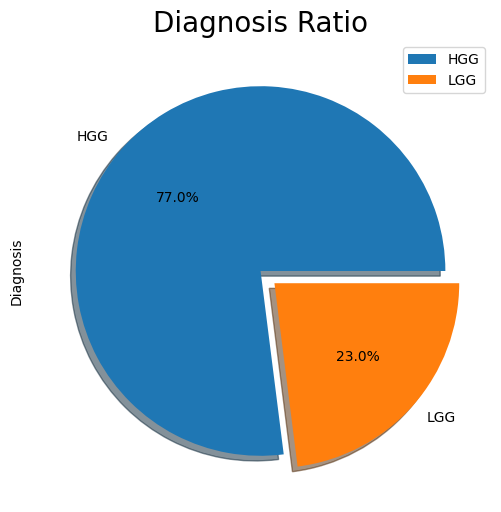

In [17]:
plt.figure(figsize=(13,6))
combined_df['Diagnosis'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=True)
plt.title("Diagnosis Ratio", fontsize = 20)
plt.legend(['HGG','LGG'])
plt.show()

In [18]:
combined_df.head(5)

,diagnostics_Image-original_Mean,diagnostics_Image-original_Minimum,diagnostics_Image-original_Maximum,diagnostics_Mask-original_VoxelNum,diagnostics_Mask-original_VolumeNum,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,...,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength,Diagnosis
0,63.008830,0.0,1043.0,27189,115,0.739545,0.687078,30.967202,45.070872,57.428216,...,0.011435,6.144567,0.018463,1.617553e+05,2.252882,0.000957,104.094198,0.005879,0.365346,HGG
1,42.644644,0.0,726.0,45839,108,0.712809,0.693697,39.632601,57.132479,64.884513,...,0.054986,5.252435,0.008486,1.872055e+06,73.989228,0.000336,9.003672,0.004367,0.019459,HGG
2,46.487673,0.0,594.0,34343,85,0.878777,0.533268,35.224154,66.053440,65.795137,...,0.032918,6.067100,0.019917,2.249511e+05,5.781757,0.000646,33.321381,0.005766,0.117617,HGG
3,63.166312,0.0,1042.0,413,18,0.770522,0.445620,8.942993,20.068633,25.553865,...,0.052850,4.426734,0.087167,9.805270e+02,0.959756,0.034447,3.630403,0.015182,0.580946,HGG
4,107.963487,0.0,1696.0,21122,95,0.880661,0.523184,26.644419,50.927387,53.665631,...,0.014013,6.107923,0.034466,3.988700e+04,12.794691,0.000747,30.437174,0.017265,0.049882,HGG


# Preprocessing

In [19]:
X=combined_df.drop(columns=['Diagnosis'],axis=1)

In [20]:
le=LabelEncoder()
Y=le.fit_transform(combined_df['Diagnosis'])

In [21]:
sc=StandardScaler()
sc.fit(X)
X=sc.transform(X)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 42)

In [23]:
print(f"X_train Shape: {X_train.shape}")
print(f"y_train Shape: {y_train.shape}")
print(f"X_test Shape: {X_test.shape}")
print(f"X_test Shape: {y_test.shape}")

X_train Shape: (789, 112)
y_train Shape: (789,)
X_test Shape: (198, 112)
X_test Shape: (198,)


# Machine Learning

**K-NN**

In [24]:
k_list = list(range(1,50,2))
cv_scores = []

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

In [25]:
MSE = [1 - x for x in cv_scores]

best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 1.


Train score:100.00
Test score:97.98
K-fold accuracy:97.72
Standard Deviation:2.64
F1 Score: 96.15
Recall Score: 94.34
Precision Score: 98.04
Specificity: 99.31
Accuracy:97.72
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       145
           1       0.98      0.94      0.96        53

    accuracy                           0.98       198
   macro avg       0.98      0.97      0.97       198
weighted avg       0.98      0.98      0.98       198



<Axes: >

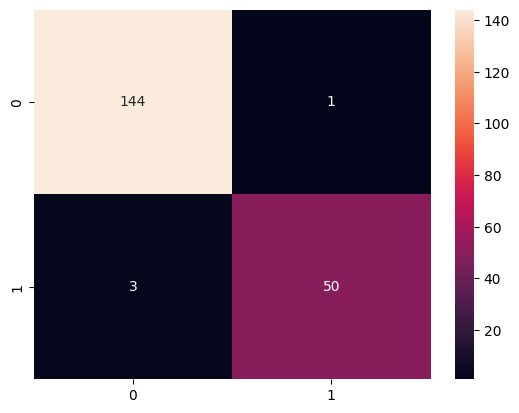

In [52]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
accuracies = cross_val_score(estimator = knn, X = X_train, y = y_train, cv = 10)
train_knn = knn.score(X_train , y_train)*100
print(f"Train score:{(train_knn):.2f}")
test_knn = knn.score(X_test , y_test)*100
print(f"Test score:{(test_knn):.2f}")
kfold_knn = np.mean(accuracies)*100
print(f"K-fold accuracy:{(kfold_knn):.2f}")
Kfold_Std_knn = accuracies.std()*100
print(f"Standard Deviation:{(Kfold_Std_knn):.2f}")
f1_knn = f1_score(y_test , knn_pred)*100
print(f"F1 Score: {f1_knn:.2f}")
re_knn = recall_score(y_test , knn_pred)*100
print(f"Recall Score: {re_knn:.2f}")
pre_knn = precision_score(y_test , knn_pred)*100
print(f"Precision Score: {pre_knn:.2f}")
cm = confusion_matrix(y_test, knn_pred)
tn, fp, fn, tp = cm.ravel()
speci_knn = tn / (tn + fp)*100
print(f"Specificity: {speci_knn:.2f}")
acc_knn = accuracies.mean()*100
print(f"Accuracy:{(acc_knn):.2f}")
print(classification_report(y_test, knn_pred))
sns.heatmap(confusion_matrix(y_test,knn_pred), annot= True, fmt= 'g')

ROC AUC: 96.82


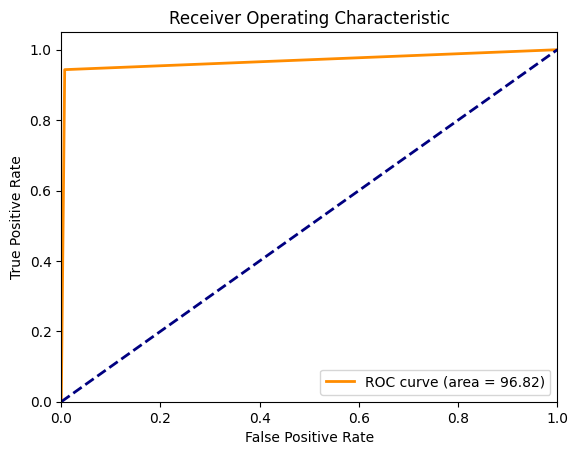

In [46]:
fpr, tpr, _ = roc_curve(y_test, knn_pred)
roc_knn = auc(fpr, tpr)*100
print(f"ROC AUC: {roc_knn:.2f}")
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

**Logistic Regression**

Train score:96.83
Test score:90.91
K-fold accuracy:95.57
Standard Deviation:1.29
F1 Score: 80.85
Recall Score: 71.70
Precision Score: 92.68
Specificity: 99.31
Accuracy:95.57
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       145
           1       0.93      0.72      0.81        53

    accuracy                           0.91       198
   macro avg       0.92      0.85      0.87       198
weighted avg       0.91      0.91      0.91       198



<Axes: >

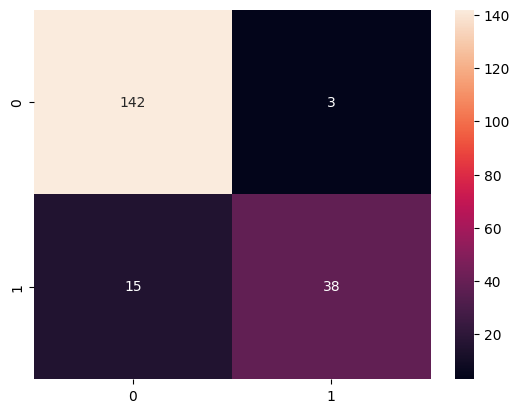

In [51]:
lgr = LogisticRegression()
lgr.fit(X_train, y_train)
lgr_pred = lgr.predict(X_test)
accuracies = cross_val_score(estimator = lgr, X = X_train, y = y_train, cv = 10)
train_lgr = lgr.score(X_train , y_train)*100
print(f"Train score:{(train_lgr):.2f}")
test_lgr = lgr.score(X_test , y_test)*100
print(f"Test score:{(test_lgr):.2f}")
kfold_lgr = np.mean(accuracies)*100
print(f"K-fold accuracy:{(kfold_lgr):.2f}")
Kfold_Std_lgr = accuracies.std()*100
print(f"Standard Deviation:{(Kfold_Std_lgr):.2f}")
f1_lgr = f1_score(y_test , lgr_pred)*100
print(f"F1 Score: {f1_lgr:.2f}")
re_lgr = recall_score(y_test , lgr_pred)*100
print(f"Recall Score: {re_lgr:.2f}")
pre_lgr = precision_score(y_test , lgr_pred)*100
print(f"Precision Score: {pre_lgr:.2f}")
cm = confusion_matrix(y_test, knn_pred)
tn, fp, fn, tp = cm.ravel()
speci_lgr = tn / (tn + fp)*100
print(f"Specificity: {speci_lgr:.2f}")
acc_lgr = accuracies.mean()*100
print(f"Accuracy:{(acc_lgr):.2f}")
print(classification_report(y_test, lgr_pred))
sns.heatmap(confusion_matrix(y_test,lgr_pred), annot= True, fmt= 'g')

ROC AUC: 84.81


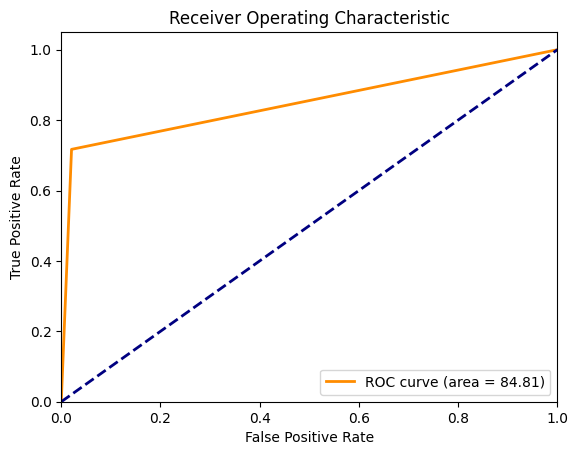

In [54]:
fpr, tpr, _ = roc_curve(y_test, lgr_pred)
roc_lgr = auc(fpr, tpr)*100
print(f"ROC AUC: {roc_lgr:.2f}")
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_lgr)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

**Decision Tree Classifier**

Train score:100.00
Test score:97.98
K-fold accuracy:98.35
Standard Deviation:1.80
F1 Score: 96.15
Recall Score: 94.34
Precision Score: 98.04
Specificity: 99.31
Accuracy:98.35
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       145
           1       0.98      0.94      0.96        53

    accuracy                           0.98       198
   macro avg       0.98      0.97      0.97       198
weighted avg       0.98      0.98      0.98       198



<Axes: >

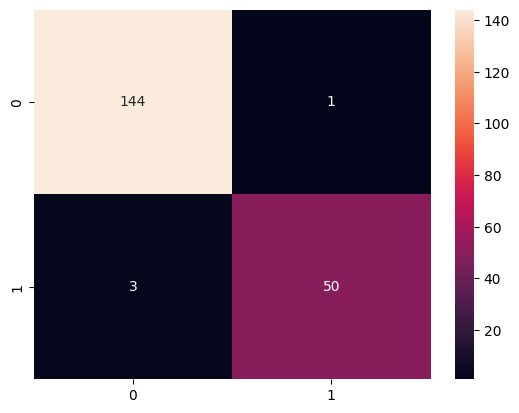

In [56]:
dtr = DecisionTreeClassifier(criterion = 'entropy',random_state = 40)
dtr.fit(X_train, y_train)
dtr_pred = dtr.predict(X_test)
accuracies = cross_val_score(estimator = dtr, X = X_train, y = y_train, cv = 10)
train_dtr = dtr.score(X_train , y_train)*100
print(f"Train score:{(train_dtr):.2f}")
test_dtr = dtr.score(X_test , y_test)*100
print(f"Test score:{(test_dtr):.2f}")
kfold_dtr = np.mean(accuracies)*100
print(f"K-fold accuracy:{(kfold_dtr):.2f}")
Kfold_Std_dtr = accuracies.std()*100
print(f"Standard Deviation:{(Kfold_Std_dtr):.2f}")
f1_dtr = f1_score(y_test , dtr_pred)*100
print(f"F1 Score: {f1_dtr:.2f}")
re_dtr = recall_score(y_test , dtr_pred)*100
print(f"Recall Score: {re_dtr:.2f}")
pre_dtr = precision_score(y_test , dtr_pred)*100
print(f"Precision Score: {pre_dtr:.2f}")
cm = confusion_matrix(y_test, knn_pred)
tn, fp, fn, tp = cm.ravel()
speci_dtr = tn / (tn + fp)*100
print(f"Specificity: {speci_dtr:.2f}")
acc_dtr = accuracies.mean()*100
print(f"Accuracy:{(acc_dtr):.2f}")
print(classification_report(y_test, dtr_pred))
sns.heatmap(confusion_matrix(y_test,dtr_pred), annot= True, fmt= 'g')

ROC AUC: 96.82


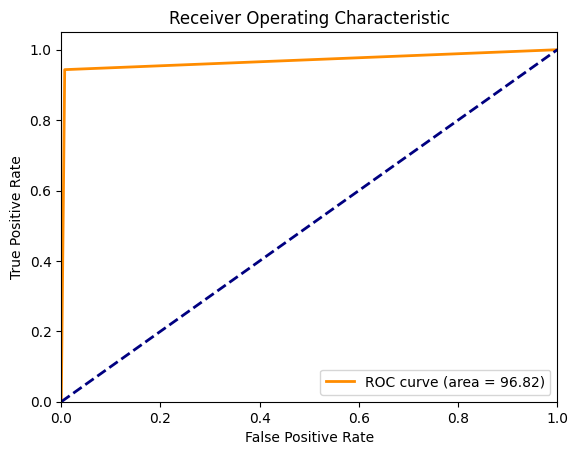

In [57]:
fpr, tpr, _ = roc_curve(y_test, dtr_pred)
roc_dtr = auc(fpr, tpr)*100
print(f"ROC AUC: {roc_dtr:.2f}")
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_dtr)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

**Naive Bayes**

Train score:83.14
Test score:77.78
K-fold accuracy:83.27
Standard Deviation:2.87
F1 Score: 55.10
Recall Score: 50.94
Precision Score: 60.00
Specificity: 87.59
Accuracy:83.27
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       145
           1       0.60      0.51      0.55        53

    accuracy                           0.78       198
   macro avg       0.72      0.69      0.70       198
weighted avg       0.77      0.78      0.77       198



<Axes: >

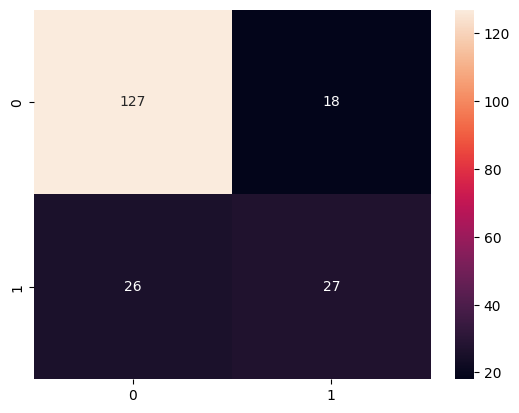

In [65]:
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
accuracies = cross_val_score(estimator = nb, X = X_train, y = y_train, cv = 10)
train_nb = nb.score(X_train , y_train)*100
print(f"Train score:{(train_nb):.2f}")
test_nb = nb.score(X_test , y_test)*100
print(f"Test score:{(test_nb):.2f}")
kfold_nb = np.mean(accuracies)*100
print(f"K-fold accuracy:{(kfold_nb):.2f}")
Kfold_Std_nb = accuracies.std()*100
print(f"Standard Deviation:{(Kfold_Std_nb):.2f}")
f1_nb = f1_score(y_test , nb_pred)*100
print(f"F1 Score: {f1_nb:.2f}")
re_nb = recall_score(y_test , nb_pred)*100
print(f"Recall Score: {re_nb:.2f}")
pre_nb = precision_score(y_test , nb_pred)*100
print(f"Precision Score: {pre_nb:.2f}")
cm = confusion_matrix(y_test, nb_pred)
tn, fp, fn, tp = cm.ravel()
speci_nb = tn / (tn + fp)*100
print(f"Specificity: {speci_nb:.2f}")
acc_nb = accuracies.mean()*100
print(f"Accuracy:{(acc_nb):.2f}")
print(classification_report(y_test, nb_pred))
sns.heatmap(confusion_matrix(y_test,nb_pred), annot= True, fmt= 'g')

ROC AUC: 69.26


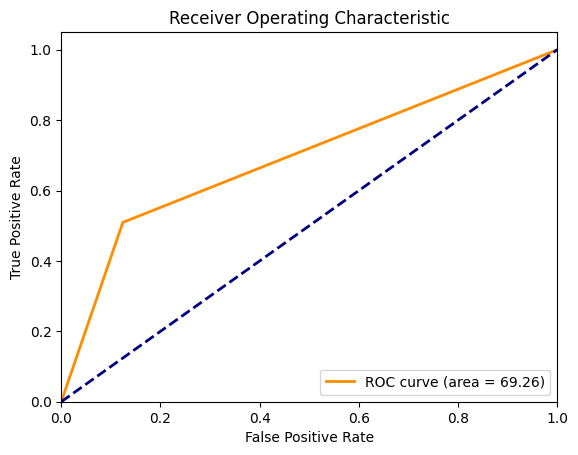

In [62]:
fpr, tpr, _ = roc_curve(y_test, nb_pred)
roc_nb = auc(fpr, tpr)*100
print(f"ROC AUC: {roc_nb:.2f}")
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_nb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

**Random Forest Classifier**

Train score:100.00
Test score:98.48
K-fold accuracy:97.85
Standard Deviation:1.79
F1 Score: 97.09
Recall Score: 94.34
Precision Score: 100.00
Specificity: 100.00
Accuracy:97.85
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       145
           1       1.00      0.94      0.97        53

    accuracy                           0.98       198
   macro avg       0.99      0.97      0.98       198
weighted avg       0.99      0.98      0.98       198



<Axes: >

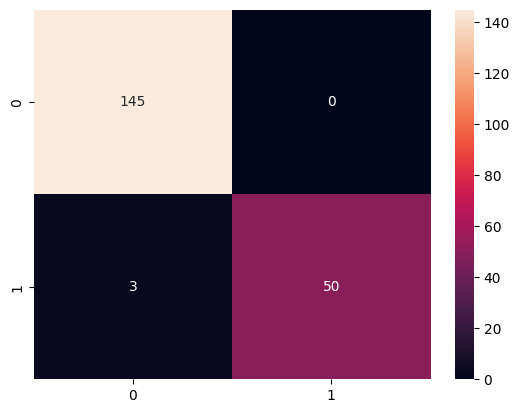

In [69]:
rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
accuracies = cross_val_score(estimator = rf, X = X_train, y = y_train, cv = 10)
train_rf = rf.score(X_train , y_train)*100
print(f"Train score:{(train_rf):.2f}")
test_rf = rf.score(X_test , y_test)*100
print(f"Test score:{(test_rf):.2f}")
kfold_rf = np.mean(accuracies)*100
print(f"K-fold accuracy:{(kfold_rf):.2f}")
Kfold_Std_rf = accuracies.std()*100
print(f"Standard Deviation:{(Kfold_Std_rf):.2f}")
f1_rf = f1_score(y_test , rf_pred)*100
print(f"F1 Score: {f1_rf:.2f}")
re_rf = recall_score(y_test , rf_pred)*100
print(f"Recall Score: {re_rf:.2f}")
pre_rf = precision_score(y_test , rf_pred)*100
print(f"Precision Score: {pre_rf:.2f}")
cm = confusion_matrix(y_test, rf_pred)
tn, fp, fn, tp = cm.ravel()
speci_rf = tn / (tn + fp)*100
print(f"Specificity: {speci_rf:.2f}")
acc_rf = accuracies.mean()*100
print(f"Accuracy:{(acc_rf):.2f}")
print(classification_report(y_test, rf_pred))
sns.heatmap(confusion_matrix(y_test,rf_pred), annot= True, fmt= 'g')

ROC AUC: 97.17


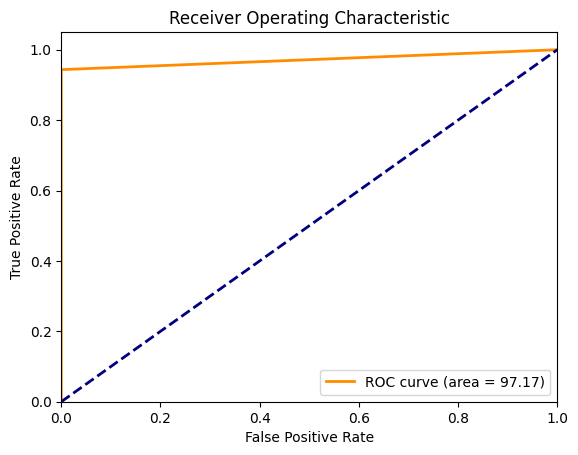

In [70]:
fpr, tpr, _ = roc_curve(y_test, rf_pred)
roc_rf = auc(fpr, tpr)*100
print(f"ROC AUC: {roc_rf:.2f}")
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

**Experimental Results**

In [71]:
Model = pd.DataFrame({
    'Model Name': ['K-Nearest Neighbours','Logistic Regression','Decision Tree Classifier','Naive Bayes','Random Forest'],
    'Precision': [pre_knn,pre_lgr,pre_dtr,pre_nb,pre_rf],
    'Recall': [re_knn,re_lgr,re_dtr,re_nb,re_rf],
    'Specificity': [speci_knn,speci_lgr,speci_dtr,speci_nb,speci_rf],
    'F1 Score': [f1_knn,f1_lgr,f1_dtr,f1_nb,f1_rf],
    'ROC AUC Score': [roc_knn,roc_lgr,roc_dtr,roc_nb,roc_rf],
    'Accuracy': [acc_knn,acc_lgr,acc_dtr,acc_nb,acc_rf]})
Model.sort_values(by=["Precision","Recall","Specificity","F1 Score","ROC AUC Score","Accuracy"], inplace = True, ascending=[True,True,True,True,True,True])
Model

,Model Name,Precision,Recall,Specificity,F1 Score,ROC AUC Score,Accuracy
3,Naive Bayes,60.000000,50.943396,87.586207,55.102041,69.264802,83.270042
1,Logistic Regression,92.682927,71.698113,99.310345,80.851064,84.814574,95.566375
0,K-Nearest Neighbours,98.039216,94.339623,99.310345,96.153846,96.824984,97.721519
2,Decision Tree Classifier,98.039216,94.339623,99.310345,96.153846,96.824984,98.351185
4,Random Forest,100.000000,94.339623,100.000000,97.087379,97.169811,97.848101
